In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 파일 경로
file_path = '/Users/yangdong-yeong/Desktop/Fnguide/data/KOSDAQ(2018~2024).csv'

# CSV 파일 불러오기

df = pd.read_csv(file_path)

# 'ticker' 열의 값을 문자열로 변환하고, 5자리인 경우 앞에 '0'을 추가
df['ticker'] = df['ticker'].astype(str).str.zfill(6)

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_66432/1711920004.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [12]:
df.head()

,날짜,시가,고가,저가,종가,거래량,등락률,ticker
0,2018-01-02,1860,1880,1830,1880,157321,1.897019,060310
1,2018-01-03,1880,2045,1880,1995,637244,6.117021,060310
2,2018-01-04,2050,2050,1990,2000,272501,0.250627,060310
3,2018-01-05,2000,2190,1990,2180,716580,9.000000,060310
4,2018-01-08,2185,2425,2160,2420,1576326,11.009174,060310


In [13]:
from pykrx import stock

market_cap_df = stock.get_market_cap("20200102")

In [14]:
market_cap_df

,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,55200,329531996760000,12993228,719663194492,5969782550
000660,94700,68941823965500,2342070,222841408700,728002365
005935,45600,37523633520000,1512362,68943333400,822886700
035420,182500,30078444587500,300640,55309555500,164813395
207940,428500,28351702500000,108281,46479752500,66165000
...,...,...,...,...,...
223220,512,2761538560,0,0,5393630
276240,518,2680339200,2,1036,5174400
001529,28000,2512216000,223,6249900,89722


## 시총

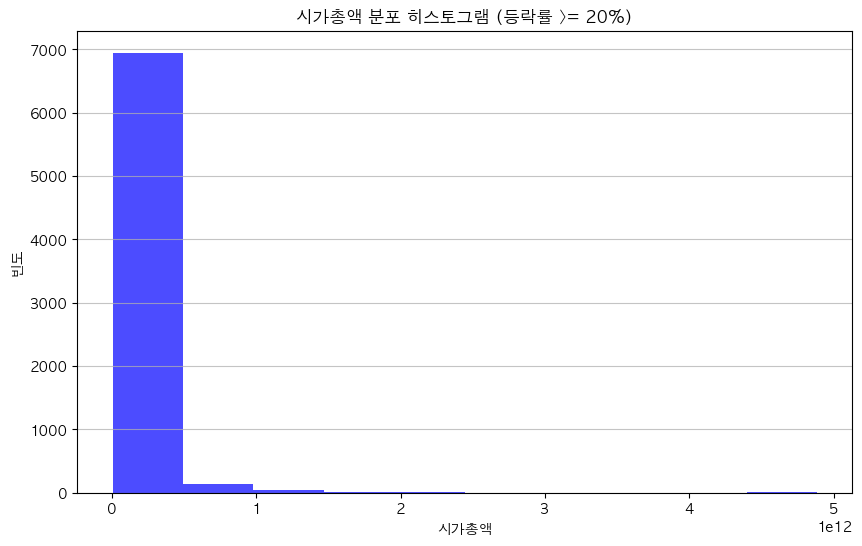

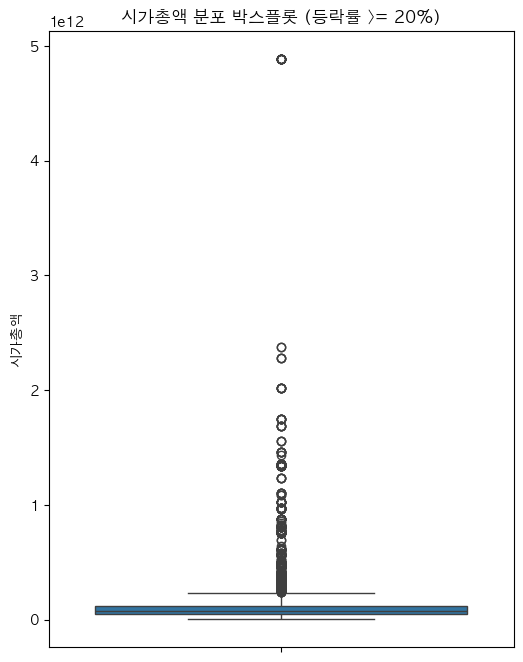

In [15]:
# 등락률 20% 이상인 데이터 필터링
high_fluctuation = df[df['등락률'] >= 20]

# Ticker를 기준으로 시가총액 데이터 연결
high_fluctuation = high_fluctuation.merge(market_cap_df, left_on='ticker', right_index=True)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시가총액 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(high_fluctuation['시가총액'], bins=10, color='blue', alpha=0.7)
plt.title('시가총액 분포 히스토그램 (등락률 >= 20%)')
plt.xlabel('시가총액')
plt.ylabel('빈도')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 박스플롯
plt.figure(figsize=(6, 8))
sns.boxplot(y=high_fluctuation['시가총액'])
plt.title('시가총액 분포 박스플롯 (등락률 >= 20%)')
plt.ylabel('시가총액')
plt.show()



In [16]:
# 등락률 20% 이상인 데이터 필터링
high_fluctuation = df[df['등락률'] >= 20]

# Ticker를 기준으로 시가총액 데이터 연결
high_fluctuation = high_fluctuation.merge(market_cap_df, left_on='ticker', right_index=True)

# 시가총액을 100억으로 나누기
high_fluctuation['시가총액 (1000억)'] = high_fluctuation['시가총액'] / 100_000_000_000


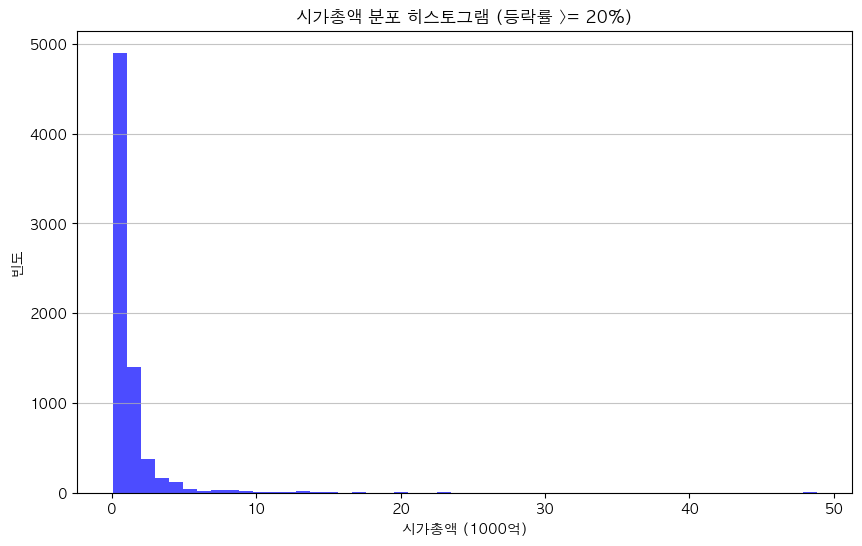

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(high_fluctuation['시가총액 (1000억)'], bins=50, color='blue', alpha=0.7)
plt.title('시가총액 분포 히스토그램 (등락률 >= 20%)')
plt.xlabel('시가총액 (1000억)')
plt.ylabel('빈도')
plt.grid(axis='y', alpha=0.75)
plt.show()

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_66432/1515492544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['시가총액 (100억)'] = filtered_data['시가총액'] / 10_000_000_000


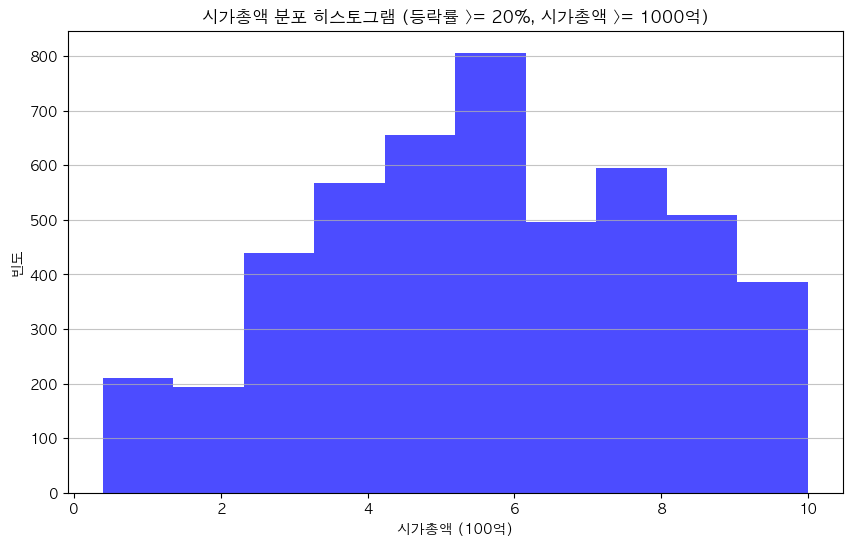

In [18]:
# 등락률 20% 이상인 데이터 필터링 및 병합
high_fluctuation = df[df['등락률'] >= 20]
high_fluctuation = high_fluctuation.merge(market_cap_df, left_on='ticker', right_index=True)

# 시가총액 1조 이상 필터링 및 1000억 단위로 나누기
filtered_data = high_fluctuation[high_fluctuation['시가총액'] <= 100_000_000_000]
filtered_data['시가총액 (100억)'] = filtered_data['시가총액'] / 10_000_000_000

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['시가총액 (100억)'], bins=10, color='blue', alpha=0.7)
plt.title('시가총액 분포 히스토그램 (등락률 >= 20%, 시가총액 >= 1000억)')
plt.xlabel('시가총액 (100억)')
plt.ylabel('빈도')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
# 등락률의 빈도를 계산
frequency_df = filtered_data.groupby('ticker')['등락률'].count().reset_index(name='등락률 빈도')

# 등락률 빈도를 내림차순으로 정렬
frequency_df = frequency_df.sort_values(by='등락률 빈도', ascending=False)

# 결과 출력
print(frequency_df)

     ticker  등락률 빈도
546  205470      29
479  136510      26
67   024060      24
40   016790      23
450  121850      23
..      ...     ...
393  095910       1
573  220100       1
578  221980       1
579  222110       1
721  950140       1

[722 rows x 2 columns]


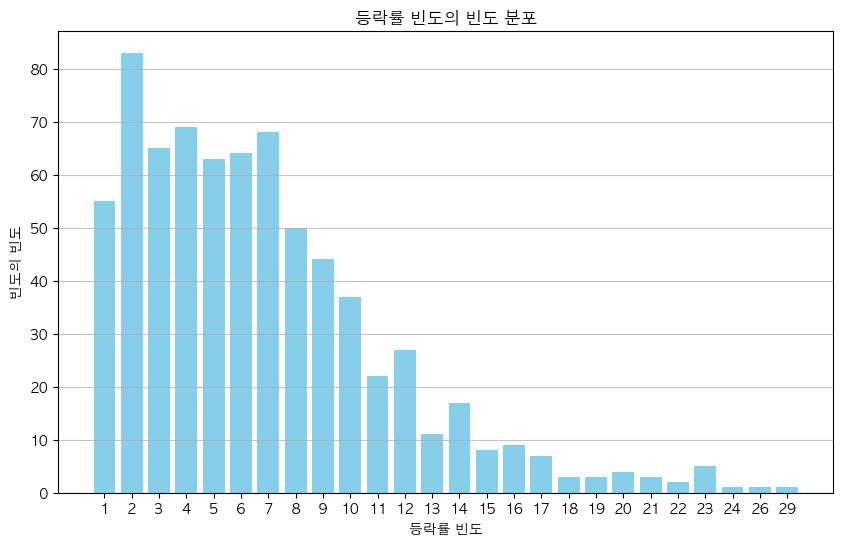

In [20]:
# 등락률의 빈도를 계산
frequency_df = filtered_data.groupby('ticker')['등락률'].count().reset_index(name='등락률 빈도')

# 등락률 빈도의 빈도를 계산
frequency_count = frequency_df['등락률 빈도'].value_counts().reset_index()
frequency_count.columns = ['등락률 빈도', '빈도의 빈도']
frequency_count = frequency_count.sort_values(by='등락률 빈도')

# 시각화: 빈도의 빈도 바 플롯
plt.figure(figsize=(10, 6))
plt.bar(frequency_count['등락률 빈도'].astype(str), frequency_count['빈도의 빈도'], color='skyblue')
plt.title('등락률 빈도의 빈도 분포')
plt.xlabel('등락률 빈도')
plt.ylabel('빈도의 빈도')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [21]:

# 모든 KOSPI 및 KOSDAQ 티커와 주식 이름을 가져오는 함수
def get_ticker_name_dict(market_type='KOSPI'):
    tickers = stock.get_market_ticker_list(market=market_type)
    ticker_name = {ticker: stock.get_market_ticker_name(ticker) for ticker in tickers}
    return ticker_name

# KOSPI 및 KOSDAQ 주식 이름 가져오기
kospi_ticker_name = get_ticker_name_dict('KOSPI')
kosdaq_ticker_name = get_ticker_name_dict('KOSDAQ')

# KOSPI와 KOSDAQ 딕셔너리 합치기
ticker_name_dict = {**kospi_ticker_name, **kosdaq_ticker_name}

# 티커를 사용하여 주식 이름을 데이터프레임에 추가
frequency_df['회사 이름'] = frequency_df['ticker'].map(ticker_name_dict)

# 등락률 빈도를 내림차순으로 정렬
frequency_df = frequency_df.sort_values(by='등락률 빈도', ascending=False)

frequency_df

,ticker,등락률 빈도,회사 이름
546,205470,29,휴마시스
479,136510,26,스마트솔루션즈
67,024060,24,흥구석유
40,016790,23,카나리아바이오
450,121850,23,코이즈
...,...,...,...
393,095910,1,에스에너지
573,220100,1,퓨쳐켐
578,221980,1,케이디켐
579,222110,1,팬젠


In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# 티커 리스트
tickers = frequency_df['ticker']

# 업종명 크롤링 함수
def get_sector_from_naver(ticker):
    url = f'https://finance.naver.com/item/main.nhn?code={ticker}'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # "동종업종비교" 섹션의 업종명 추출
        h4_tag = soup.find('h4', class_='h_sub sub_tit7')
        if h4_tag and h4_tag.find('em'):
            em_text = h4_tag.find('em').get_text()
            sector_part = em_text.split('업종명 :')[1].split('｜')[0].strip()
            return sector_part
    return "Unknown"

# 티커별로 업종명 정보를 추가
frequency_df['업종명'] = frequency_df['ticker'].apply(get_sector_from_naver)

# 등락률 빈도가 1인 행 제거
frequency_df = frequency_df[frequency_df['등락률 빈도'] != 1]

# 등락률 빈도를 내림차순으로 정렬
frequency_df = frequency_df.sort_values(by='등락률 빈도', ascending=False)

# 결과 출력
print(frequency_df)

     ticker  등락률 빈도    회사 이름         업종명
546  205470      29     휴마시스  생명과학도구및서비스
479  136510      26  스마트솔루션즈   반도체와반도체장비
67   024060      24     흥구석유       석유와가스
40   016790      23  카나리아바이오          식품
450  121850      23      코이즈  디스플레이장비및부품
..      ...     ...      ...         ...
404  099440       2       스맥          기계
100  032750       2       삼진        전자제품
57   020710       2     시공테크  호텔,레스토랑,레저
58   021040       2    대호특수강          철강
320  072990       2    에이치시티     전자장비와기기

[667 rows x 4 columns]


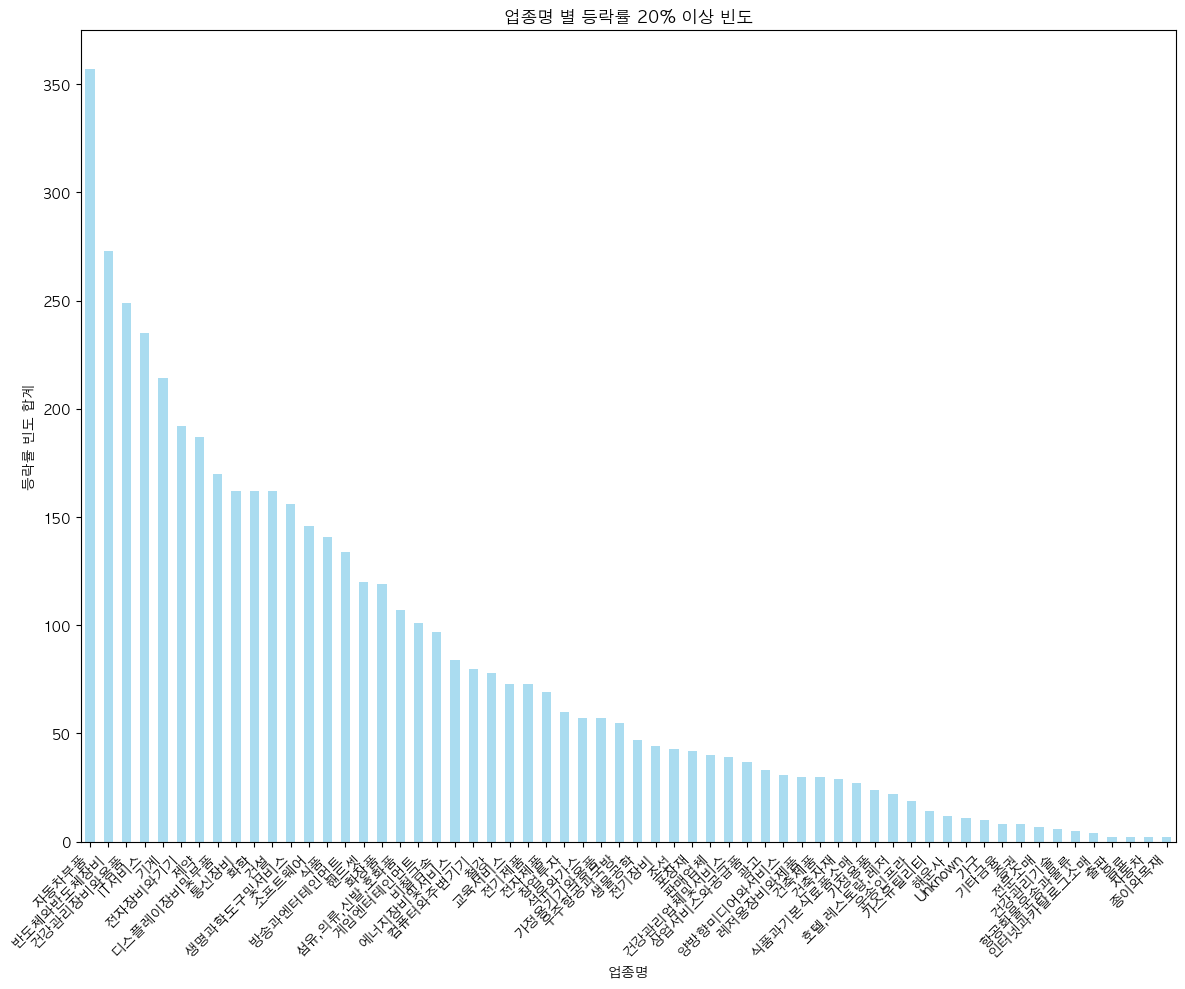

In [26]:
# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 업종명 별 등락률 빈도 합계 계산
sector_frequency = frequency_df.groupby('업종명')['등락률 빈도'].sum()

# 결과를 빈도가 높은 순으로 정렬
sector_frequency = sector_frequency.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 10))
sector_frequency.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('업종명 별 등락률 20% 이상 빈도')
plt.xlabel('업종명')
plt.ylabel('등락률 빈도 합계')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

바이오가 1등일줄 알았는데 자동차, it 관련 테마가 가장 높음 ai 관련 테마 영향?

## 날짜

20 년도에는 코로나 때문인듯?

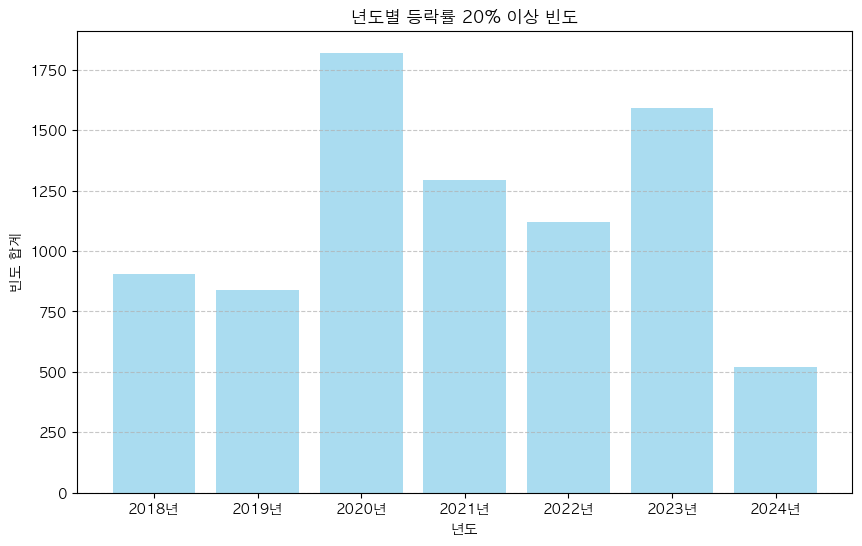

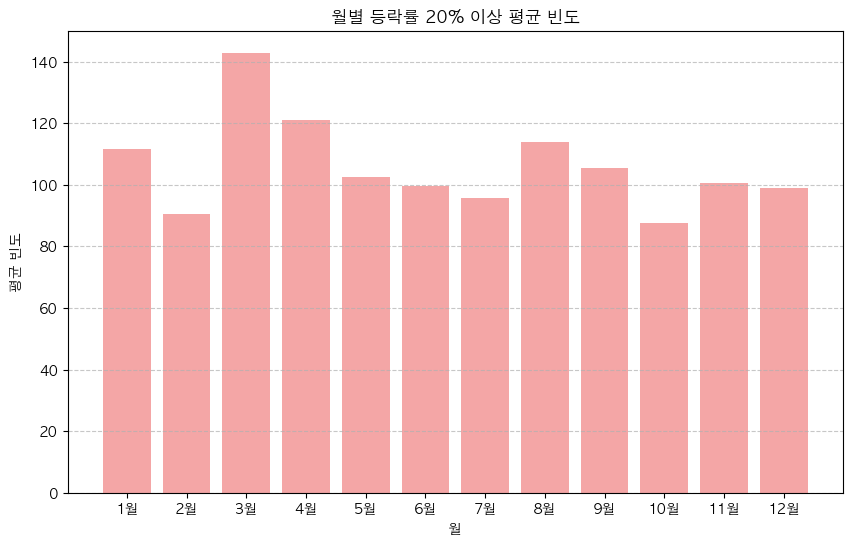

In [9]:
# 년도별 빈도 그래프
yearly_totals = frequency.groupby('년도')['빈도'].sum()

plt.figure(figsize=(10, 6))
plt.bar(yearly_totals.index, yearly_totals.values, color='skyblue', alpha=0.7)
plt.title('년도별 등락률 20% 이상 빈도')
plt.xlabel('년도')
plt.ylabel('빈도 합계')
plt.xticks(yearly_totals.index, [f'{year}년' for year in yearly_totals.index])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 월별 평균 빈도 그래프
monthly_means = frequency.groupby('월')['빈도'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_means.index, monthly_means.values, color='lightcoral', alpha=0.7)
plt.title('월별 등락률 20% 이상 평균 빈도')
plt.xlabel('월')
plt.ylabel('평균 빈도')
plt.xticks(monthly_means.index, [f'{month}월' for month in monthly_means.index])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

      년도   월   빈도
0   2018   1  122
1   2018   2   68
2   2018   3   55
3   2018   4  130
4   2018   5  146
..   ...  ..  ...
71  2023  12  153
72  2024   1  149
73  2024   2  125
74  2024   3  154
75  2024   4   90

[76 rows x 3 columns]


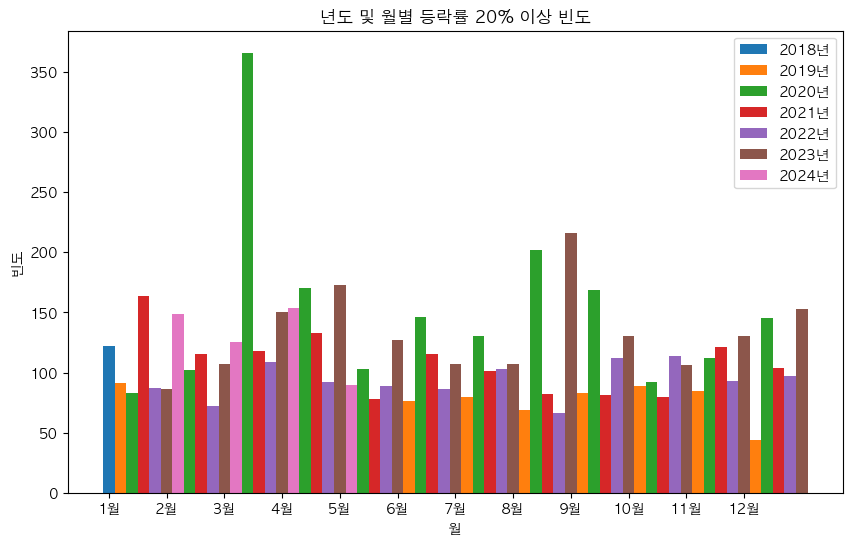

In [6]:
# '날짜' 컬럼을 datetime으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 년도와 월 컬럼 추가
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month

# 등락률이 20 이상인 데이터 필터링
filtered_df = df[df['등락률'] >= 20]

# 년도와 월별로 그룹화하여 빈도 계산
frequency = filtered_df.groupby(['년도', '월']).size().reset_index(name='빈도')

# 결과 확인
print(frequency)

# 시각화
plt.figure(figsize=(10, 6))
for year in frequency['년도'].unique():
    subset = frequency[frequency['년도'] == year]
    plt.bar(subset['월'] + (year - 2018) * 0.2, subset['빈도'], width=0.2, label=f'{year}년')

plt.xlabel('월')
plt.ylabel('빈도')
plt.title('년도 및 월별 등락률 20% 이상 빈도')
plt.xticks(ticks=np.arange(1, 13), labels=[f'{month}월' for month in range(1, 13)])
plt.legend()
plt.show()